### Imports

In [16]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

### Ejercicio 1.2


Suponga que vamos a utilizar un perceptrón para detectar mensajes de spam. Digamos que cada mensaje en el correo está representado por una frecuencia de ocurrencias de palabras clave, y que el output es +1 si el mensaje se considera spam.

a) ¿Puede pensar en algunas palabras clave que terminen teniendo un peso positivo considerable en el perceptrón?

b) ¿Qué tal algunas palabras clave con peso negativo?

c) ¿Qué parametro en el perceptrón afecta directamente cuantos mensajes frontera terminan siendo clasificados como spam?

**Respuestas**:

a) Gratis, barato, gana, !!!, deuda, ganar, enlace, bono, ganador.

b) Saludo, cordialmente, cordial, estudiante, unal, Universidad, el, la, fecha, David Casallas.

c) El parametro del bias, pues de él depende qué tan permisivo es el perceptrón para clasificar mensajes como spam o no spam, es decir qué tan similar puede ser un mensaje a lo que consideramos spam pero sin serlo.

### Ejercicio 1.3

La regla de actualización por peso en (1.3) tiene una buena interpretación de que se mueve en la dirección de clasificar x(t) correctamente.

a) Muestre que y(t)w^T(t)x(t) < 0

b) Muestre que y(t)w^T(t+1)x(t) > y(t)w^T(t)x(t)

c) En lo que respecta a clasificar a x(t), argumente que moverse de w(t) a w(t+1) es un movimiento en "la dirección correcta".

**Respuestas**:

a) Si x(t) no estuviera clasificado correctamente por w(t), entonces w^T(t)x(t) tiene diferente signo a y(t), por lo tanto y(t)w^T(t)x(t) < 0.

b) Empecemos con: y(t)w^T(t+1)x(t) = y(t)(w(t)+y(t)x(t))^T x(t) = y(t)(w^T(t) + y(t)x^T(t)) x(t) = y(t)w^T(t)x(t) + y(t)y(t)x^T(t)x(t) > y(t)w^T(t)x(t) pues y(t)y(t)x^T(t)x(t) es mayor o igual que 0.

c) Del anterior punto sabemos que con cada iteración y(t)w^T(t)x(t) va aumentando. 

Vamos ahora a pensar en casos, primero sí y(t) es positivo, pero w^T(t)x(t) es negativo, movemos w^T(t)x(t) en dirección positiva aumentando su valor.

Sí y(t) es negativo, pero w^T(t)x(t) es positivo, entonces el aumento de y(t)w^T(t)x(t) significa que w^T(t)x(t) está decreciendo, por lo tanto se mueve hacia la región negativa.

Así que al movernos de w(t) a w(t+1), estamos haciendo un movimiento "en la dirección ccorrecta" almenos en lo que respecta a clasificar a x(t).

### Ejejercicio 1.10

Aquí hay un experimento que ilustra la diferencia entre un único bin y multiples bins. Corra una simulación a computador tirando 1000 monedas justas. Corra cada moneda independientemente 10 veces. Concentremonos en 3 monedas de la sigiente forma: C1 es la primera moneda tirada, Crand es una moneda que usted elige aleatoriamente, Cmin es la moneda que tuvo la minima frecuencia de caras. Sea V1, Vrand y Vmin la fracción de caras que se obtuvo de las respectivas 3 monedas.

a) Qué es miu para las 3 monedas seleccionadas?

b) Repite el experimento a una escala mayor (por ejemplo 100000 veces) para obtener diferentes instancias de las Vs y plotea el histograma de las distribuciones de V1, V rand y Vmin. Note que Crand y Cmin puede cambiar en diferentes ejecuciones.

c) Utilizando (b) plotee el estimado para P[|v-miu|>epsilon] como una función de epsilon junto con la cota de Hoeffding 2e^(-2e^(2)N)

d) Cuál de las monedas obedece la cota de Hoeffding y cuál no?

e) Relacione la parte (d) a multiples bins en la figura 1.10

In [30]:
def flip_coins(total_coins):
    hts = np.zeros(total_coins)
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts

def run_once(total_coins, total_flips, print_freq = False):
    crand = np.random.choice(total_coins)
    hts_sum = np.zeros(total_coins)
    
    for flip in range(total_flips):
        hts_sum = hts_sum + flip_coins(total_coins)
    
    hts_freq = hts_sum/total_flips
    
    v1 = hts_freq[0]
    vrand = hts_freq[crand]
    cmin = np.argmin(hts_sum)
    vmin = hts_freq[cmin]
    
    if print_freq:
        print('Frecuencia de la primera moneda: ',v1)
        print('Frecuencia para moenda aleatoria: id({})-freq({})'.format(crand, vrand))
        print('Frecuencia de la moneda con la frecuencia mínima: id({})-freq({})'.format(cmin, vmin))
    return v1,vrand,vmin

def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)

**Respuestas**:

a) El miu para las 3 monedas es todas 0.5 pues todas las monedas son justas

In [55]:
n_monedas = 1000
n_tiros = 10
run_once(n_monedas, n_tiros, True)

Frecuencia de la primera moneda:  0.5
Frecuencia para moenda aleatoria: id(349)-freq(0.6)
Frecuencia de la moneda con la frecuencia mínima: id(455)-freq(0.0)


(0.5, 0.6, 0.0)

b)

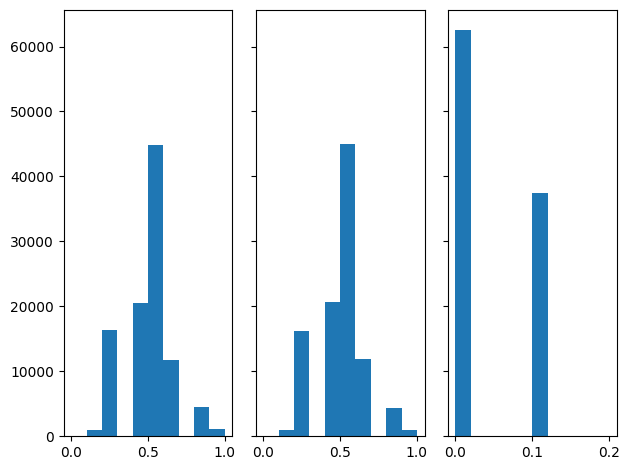

In [32]:
# Exercise 1.10 (b) 
total_coins = 1000
total_flips = 10
total_runs = 100000
v1s, vrands, vmins = [],[],[]
for run in range(total_runs):
    v1,vrand,vmin = run_once(total_coins, total_flips)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)

fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
n_bins = 10
axs[0].hist(v1s,bins=n_bins)
axs[1].hist(vrands,bins=n_bins)
axs[2].hist(vmins,bins=n_bins)
print()

c)

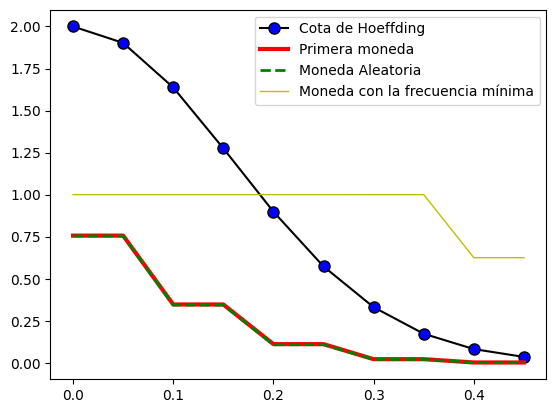

In [62]:
eps = np.arange(0.0,0.5,0.05)
bounds = hoeffding_bound(eps, total_flips)
v1s, vrands, vmins = np.array(v1s), np.array(vrands), np.array(vmins)
v1d = np.abs(v1s-0.5)
vrandd = np.abs(vrands-0.5)
vmind = np.abs(vmins-0.5)

p1, prand, pmin = np.zeros(len(eps)),np.zeros(len(eps)),np.zeros(len(eps))

for idx in range(eps.shape[0]):
    ep = eps[idx]
    p1[idx] = np.sum(v1d > ep)/total_runs
    prand[idx] = np.sum(vrandd > ep)/total_runs
    pmin[idx] = np.sum(vmind > ep)/total_runs
    
plt.plot(eps, bounds, marker='o', markerfacecolor='blue', markersize=8, color='black', label='Cota de Hoeffding')
plt.plot(eps, p1, marker='', color='r', linewidth=3, label='Primera moneda')
plt.plot(eps, prand, marker='', color='g', linewidth=2, linestyle='dashed', label='Moneda Aleatoria')
plt.plot(eps, pmin, marker='', color='y', linewidth=1, label='Moneda con la frecuencia mínima')
plt.legend()

d) La primera y la moneda aleatoria son acotadas por Hoeffding. La moneda con la frecuencia mínima no obdece la cota de Hoeffding debido a que fue elegida luego de realizar el experimento, lo cuál no obedece la primera condición de Hoeffding que es la de fijar la hipotesis antes de sacar las muestras.

e) Cuando elegimos la moneda que tiene la menor frecuencía de caras es como elegir el bin de los 1000 bins, sin embargo elegimos el bin luego de las muestras. Las otras dos monedas se toman antes de las muestras, es decir tomar el bin antes de.

### Ejercicio 1.11

Nos dan un conjunto de datos D de 25 ejemplos de entrenamiento para una función objetivo desconocida f:X -> Y, donde X=R, Y = {-1,+1}. Para aprender f, utilizamos un conjunto hipotesis simple H = {h_1,h_2} donde h_1 es la función constante +1 y h_2 es la función constante -1.

Nosotros consideramos 2 algoritmos de aprendizaje, S (inteligente) y C(loco). S elige la hipotesis  que está de acuerdo con la mayoría de D y C elige la otra hipotesis deliveradamente. Veamos cómo estos algoritmos se desempeñan fuero de las pruebas de un punto de vista deterministico y ptobabilistico. Asuma que en el punto de vista probabilistico hay una distribución en X y sea P[f(x) = +1] = p

a) Puede S producir una hipotesis que es garantizada para desempeñarse fuera de D en puntos aleatorios?

b) Asuma que para el resto del ejercicio todos los ejemplos en D tienen y_n = +1. Es posible que la hipotesis que produce C sea mejor que la de S?

c)Si p=0.9, cuál es la probabilidad de que S porduzca una mejor hipotesis que C?

d) Existe un valor de p para el cual C produce una mejor hipotesis que S?

**Respuestas**:

a) S no puede producir una hipotesis que garantiza un mejor desempeño fuera de D. Note que una función que elija aleatoriamente tendría mejor desempeño que S, pues si para D todos los resultados son +1, entonces S jamás va a predecir un -1.

b) Es posible que C produzca una mejor hipotesis que S, precisamente por lo explicado en (a)

c) Si todo punto en D tiene 1, entonces S elige h_1 y C elige h_2, así que fuera de D h_1 tiene un chance del 90% para coincidir con f, mientras que h_2 tiene solo 10% de chance, así que S siempre tendrá una mejor hipotesis que C.

d) Del problema anterior sabemos que cuando p<0.5 entonces C tendrá una mejor hipotesis que S, pues C siempre produce h_2 que va a coincidir mejor con f que h_1 si p<0.5

### Ejercicio 1.12

Un amigo decide pedirte ayuda con un problema de aprendizaje. Te dice que la finción objetivo f es completamente desconocida, pero tiene 4000 puntos de datos. Está dispuesto a pagarte para resolver este problema y producir para él un g que se aproxime a f. Qué es lo mejor que puedes hacer para tu amigo de entre lo siguiente:

a) Luego de aprender le vas a dar un g que garantizado aproxima a f fuera de la muestra.

b) Luego de aprender le vas a dar un g, y con alta probabilidad de que el g que produzcas se aproxime a f fuera de la muestra.

c) Un de dos cosas, la primera es que produces una hipotesis g y la segunda es que vas a declarar que fallaste. Si retornas la hipotesis g, entonces hay una alta probabilidad de que la g que produzcas se aproxime a f fuera de la muestra.

**Respuesta**:

Lo mejor que puedo prometer es c). Primero que anda la función objetivo f puede ser tan complicada que no se pueda aprender de ninguna forma. Segundo si se puede aprender y producir una hipotesis g, entonces como hay muchos puntos de datos, la probabilidad de que g coincida con f es bastante alta. Esto fundamentado en la desigualdad de Hoeffding y que el error de g puede ser pequeño debido a que tenemos un dataset grande.